# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

## Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading train dataset

In [2]:
df1 = pd.read_csv('blackFriday_train.csv')

print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Loading test dataset

In [3]:
df2 = pd.read_csv('blackFriday_test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
print(df2.shape) # checking the number of rows and columns in the test dataset

(233599, 11)


### Merging both train and test dataset.

In [5]:
df = df1.append(df2, sort=False)
df.shape

(783667, 12)

### visualizing fist 5 rows of the dataset.


In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Describing the basic statistics of the data.

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


## Data Preprocessing

#### Dropping unnecessary fields from the dataset.


In [9]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [10]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [13]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [14]:
df['Gender']=df['Gender'].map({'F':0, 'M':1})

In [15]:
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

In [16]:
df.columns #checking the columns after changing column names

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase'],
      dtype='object')

In [17]:
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4,0,8,NaN,NaN,7969.0


### Dealing with Missing Values

In [18]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                          245982
cat3                          545809
Purchase                      233599
dtype: int64

#### Visualizing unique values of fields which contains NAN values for different columns.

In [19]:
df.Purchase.unique()  

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [20]:
df.cat2.unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df.cat3.unique()  

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

#### Filling the nan values with the mode.

In [22]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [23]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [24]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [25]:
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase
0,0,1,10,A,2,0,3,8.0,16.0,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,8.0,16.0,1422.0
3,0,1,10,A,2,0,12,14.0,16.0,1057.0
4,1,7,16,C,4,0,8,8.0,16.0,7969.0


#### Rechecking the null values.

In [26]:
df.isnull().sum() # all the null values have been removed

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
dtype: int64

### Dealing with Categorical variable

In [27]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


#### Concatinaing dummy variables with original dataset.

In [28]:
df = pd.concat([df,city],axis=1)
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


In [29]:
df.drop('City_Category',axis=1, inplace=True) 

In [30]:
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


#### Correcting the data types

In [31]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

#### Rechecking the datatypes of the dataset.

In [32]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

### Creating a checkpoint.

In [33]:
df_i = df.copy()

In [34]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


### Visualizing Age Vs Purchased.

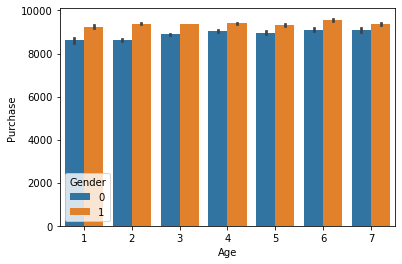

In [35]:
sns.barplot('Age','Purchase',hue='Gender',data=df_i)

Purchasing of goods of each range of age are almost equal.
We can conclude that the percentage of purchasing goods of men over women is higher.

### Visualizing Occupation Vs Purchased.

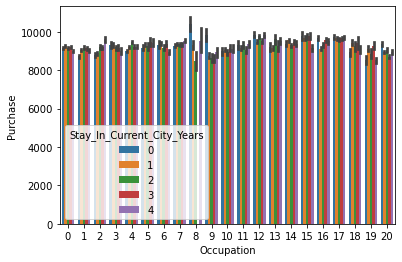

In [36]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

### Visualizing Product_category1 Vs Purchased.

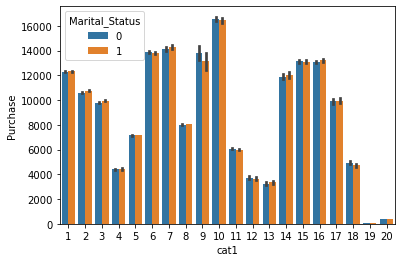

In [37]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category2 Vs Purchased.

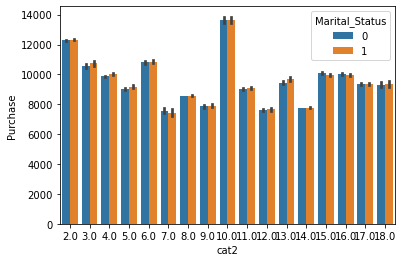

In [38]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category3 Vs Purchased.

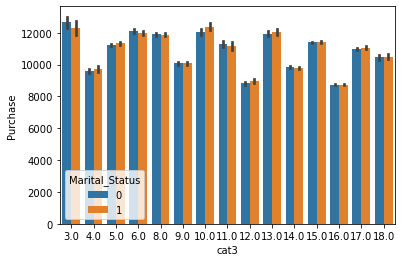

In [39]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.
product category3 is much more purchased by people than product category2 and product category1 

In [40]:
X = df_i.drop('Purchase',axis=1) # dropping the Purchase column to create features
y = df_i.Purchase  # selecting the Purchase column to create labels
print(X.shape)
print(y.shape)

(783667, 10)
(783667,)


In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


In [42]:
# Feature Scaling So that data in all the columns are to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Creating Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train,y_train)
pred_dtr = model_dtr.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
print('Mean Squared Error for Decision Tree:',mean_squared_error(pred_dtr,y_test))
print('Mean Absolute Error for Decision Tree:',mean_absolute_error(pred_dtr,y_test))

Mean Squared Error for Decision Tree 12065483.71055182
Mean Absolute Error for Decision Tree 2590.882988266301


### Creating a Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
model_rfr = rfr.fit(X_train,y_train)
pred_rfr = model_rfr.predict(X_test)

In [52]:
print('Mean Squared Error for Random Forest:',mean_squared_error(pred_rfr,y_test))
print('Mean Absolute Error for Random Forest:',mean_absolute_error(pred_rfr,y_test))

Mean Squared Error for Random Forest: 10498849.0118499
Mean Absolute Error for Random Forest: 2490.418418350609


### Creating an XGBoost Model

In [49]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
model_xgb = xgb.fit(X_train,y_train)
pred_xgb = model_xgb.predict(X_test)

In [51]:
print('Mean Squared Error for XGBoost:',mean_squared_error(pred_xgb,y_test))
print('Mean Absolute Error for XGBoost:',mean_absolute_error(pred_xgb,y_test))

Mean Squared Error for XGBoost: 9276665.625133606
Mean Absolute Error for XGBoost: 2410.5585039343177


### Selecting the Model

From the above model we can see that XGBoost model has lowest mean_squared_error and mean_absolute_error. So we will move forward with XGBooost model